# EMPIAR Download Example

Here we show how to download a single image from EMPIAR via MongoDB Management.

In [1]:
import sys, os
project_root = os.path.dirname(os.path.abspath('.'))
if project_root not in sys.path:
    sys.path.append(project_root)
print(f"{project_root = }")
from CryoCRAB import *
import logging
logging.getLogger().setLevel(logging.DEBUG)
logging.getLogger("pymongo").setLevel(logging.WARNING)

project_root = '/home/vrlab/code/Cryo/CryoCRAB-Scripts'
/home/vrlab/code/Cryo/CryoCRAB-Scripts


In [ ]:
# os.environ["CRYOCRAB_PROJECT_SAVE_DIR"] = None
# os.environ["CRYOCRAB_MONGODB_HOST"] = None
# os.environ["CRYOCRAB_MONGODB_PORT"] = None
# os.environ["CRYOCRAB_MONGODB_DBNAME"] = None

## Preview EMPIAR Image/Gain Suffix

Preview image/gain suffix: 2043it [00:01, 1260.44it/s]


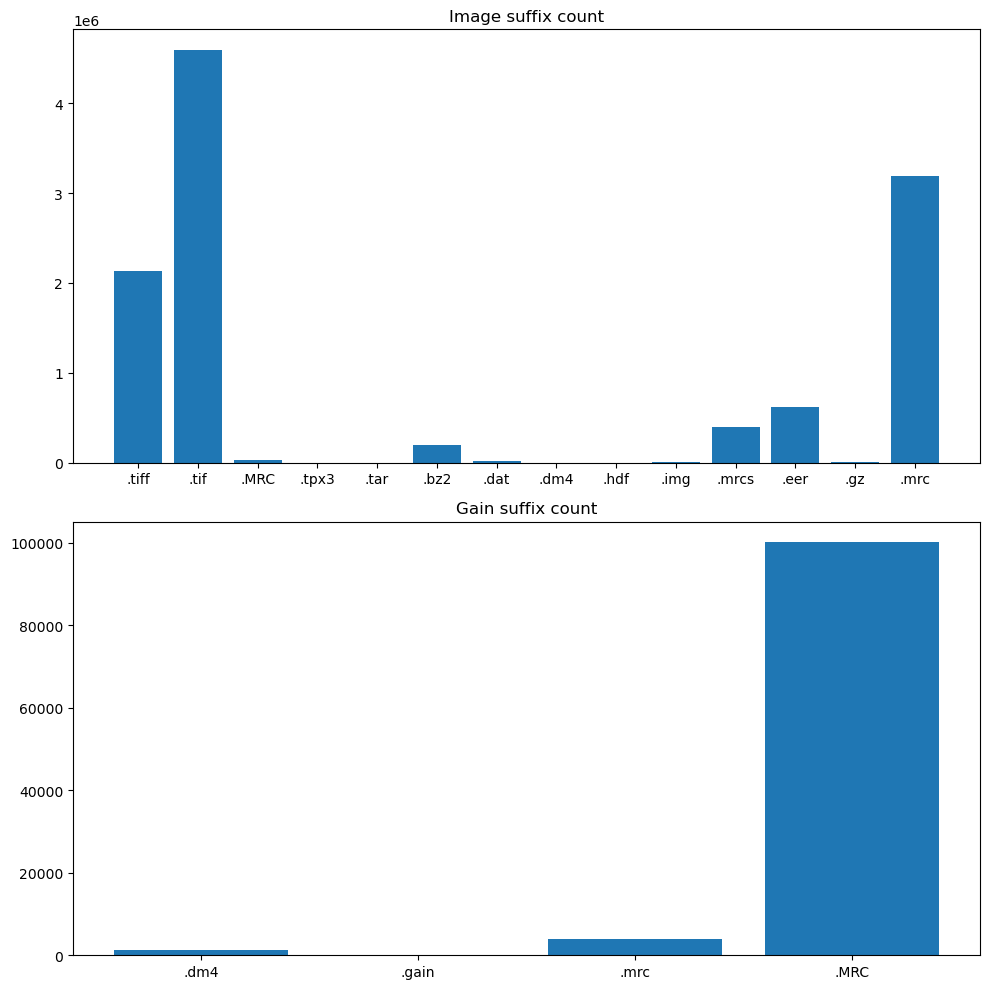

image_suffix_count_dict = {'.tiff': 2135763, '.tif': 4591641, '.MRC': 27060, '.tpx3': 2975, '.tar': 1, '.bz2': 202284, '.dat': 24506, '.dm4': 41, '.hdf': 50, '.img': 3154, '.mrcs': 395334, '.eer': 623882, '.gz': 3160, '.mrc': 3184665}
gain_suffix_count_dict = {'.dm4': 1397, '.gain': 99, '.mrc': 3919, '.MRC': 100116}


Update image/gain suffix: 3275it [00:07, 456.31it/s]


In [2]:
from CryoCRAB.pipeline.cryosparc_data_process import \
    preview_all_suffixes_in_spa_empiar_dataset, \
    update_empiar_dataset_image_and_gain_suffix
    
image_suffix_count_dict, gain_suffix_count_dict = preview_all_suffixes_in_spa_empiar_dataset()
print(f"{image_suffix_count_dict = }")
print(f"{gain_suffix_count_dict = }")
update_empiar_dataset_image_and_gain_suffix()

## Single Image Download Example

In [2]:
from CryoCRAB.utils.datatype import SingleImageTestStatus, CryoCRAB_DataManager, DownloadMode, CryoCRAB_Download_DataType
from CryoCRAB.pipeline.cryosparc_data_process.helper_func \
    import update_dataset_SingleImageTestStatus, get_ftp_download_path, unset_dataset_SingleImageTestStatus
from CryoCRAB.utils.cryosparc import get_cryosparc_client
from CryoCRAB.utils.mongodb import get_spa_micrograph_dataset

micrograph_dataset = get_spa_micrograph_dataset()
document = micrograph_dataset.find_one({
        "status.single_image_test": {"$exists": False}, 
        "image_num": {"$gte": 0}
    }) # find one document without tested
update_dataset_SingleImageTestStatus(micrograph_dataset, document, SingleImageTestStatus.testing)

# download
update_dataset_SingleImageTestStatus(micrograph_dataset, document, SingleImageTestStatus.downloading)
cryocrab_datamanager = CryoCRAB_DataManager(DownloadMode.local)
empiar_ftp_directory = document["empiar_ftp_directory"]
empiar_relative_directory = document["empiar_relative_directory"]
empiar_image_relative_path = document["empiar_image_relative_paths"][0]
ftp_path = get_ftp_download_path(empiar_ftp_directory, empiar_relative_directory, empiar_image_relative_path)
ftp_file_size, local_file_size = cryocrab_datamanager.download_via_ftp(document["imageset_name"], ftp_path, CryoCRAB_Download_DataType.micrograph)
if ftp_file_size != local_file_size:
    print(f"Download failed: {ftp_path}")
    unset_dataset_SingleImageTestStatus(micrograph_dataset, document)
# debug
unset_dataset_SingleImageTestStatus(micrograph_dataset, document)

INFO:root:Start FTP Download 10012/data/BGal_000263.mrc -> /home/vrlab/code/Cryo/CryoCRAB-Scripts/Data/empiar-10012-imageset-00/micrograph/raw/BGal_000263.mrc
INFO:root:FTP download costs: 23.04 s.
